In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
rain_data211 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172151.csv',encoding='cp949')
rain_data101 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172202.csv',encoding='cp949')
rain_data100 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172215.csv',encoding='cp949')
rain_data212 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172236.csv',encoding='cp949')
rain_data90 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172245.csv',encoding='cp949')

In [48]:
# rain_data = pd.merge(rain_data211, rain_data101, how='outer')
from functools import reduce

rain_data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data211, rain_data101, rain_data100, rain_data212, rain_data90])

In [49]:
print(rain_data)

              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
0     2009-01-01         NaN         NaN         NaN         NaN        NaN
1     2009-01-02         NaN         NaN         NaN         NaN        NaN
2     2009-01-03         NaN         NaN         NaN         NaN        NaN
3     2009-01-04         NaN         NaN         NaN         NaN        NaN
4     2009-01-05         NaN         NaN         NaN         NaN        NaN
...          ...         ...         ...         ...         ...        ...
5473  2023-12-27         NaN         NaN         NaN         NaN        NaN
5474  2023-12-28         NaN         NaN         NaN         NaN        NaN
5475  2023-12-29         NaN         NaN         NaN         NaN        NaN
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8

[5478 rows x 6 columns]


In [50]:
rain_col = [i for i in rain_data.columns if '강수' in i]
rain_data[rain_col] = rain_data[rain_col].fillna(0)

In [51]:
print(rain_data.isna().sum().sum())
print(rain_data)

0
              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
0     2009-01-01         0.0         0.0         0.0         0.0        0.0
1     2009-01-02         0.0         0.0         0.0         0.0        0.0
2     2009-01-03         0.0         0.0         0.0         0.0        0.0
3     2009-01-04         0.0         0.0         0.0         0.0        0.0
4     2009-01-05         0.0         0.0         0.0         0.0        0.0
...          ...         ...         ...         ...         ...        ...
5473  2023-12-27         0.0         0.0         0.0         0.0        0.0
5474  2023-12-28         0.0         0.0         0.0         0.0        0.0
5475  2023-12-29         0.0         0.0         0.0         0.0        0.0
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8

[5478 rows x 6 columns]


In [52]:
dam_flow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/only_dam_flow.csv',encoding='utf-8')

print(dam_flow)

              날짜  유입량(㎥/s)
0     2009-01-01     0.000
1     2009-01-02     0.825
2     2009-01-03     3.904
3     2009-01-04     0.000
4     2009-01-05     0.000
...          ...       ...
5473  2023-12-27    25.873
5474  2023-12-28    21.186
5475  2023-12-29    20.887
5476  2023-12-30    29.183
5477  2023-12-31    25.803

[5478 rows x 2 columns]


In [53]:
data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data, dam_flow])

In [10]:
print(max(data['유입량(㎥/s)']))

3918.5


<Axes: xlabel='날짜'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


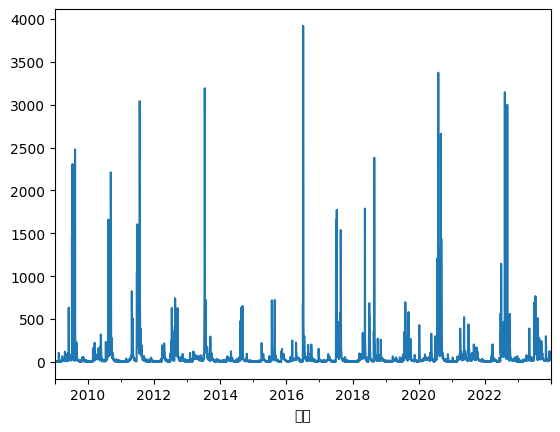

In [54]:
data.index = pd.to_datetime(data['날짜'])

dam_flow = data['유입량(㎥/s)']
dam_flow.plot()

In [12]:
data['Y'] = data['유입량(㎥/s)'].shift(-2)
data = data.dropna()

train = data[data['날짜']<'2018-01-01']
valid = data[data['날짜']>='2018-01-01']
valid = valid[valid['날짜']<'2023-01-01']
test = data[data['날짜']>='2023-01-01']
print('train set : ', len(train),"\n",
      'valid set : ', len(valid), "\n",
      'test set : ', len(test), "\n")

trainX, trainY = train.drop(['날짜', 'Y'], axis = 1), train['Y']
validX, validY = valid.drop(['날짜', 'Y'], axis = 1), valid['Y']
testX, testY = test.drop(['날짜', 'Y'], axis = 1), test['Y']

train set :  3287 
 valid set :  1826 
 test set :  363 



In [14]:
len(trainX.columns)


6

<Axes: xlabel='날짜'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


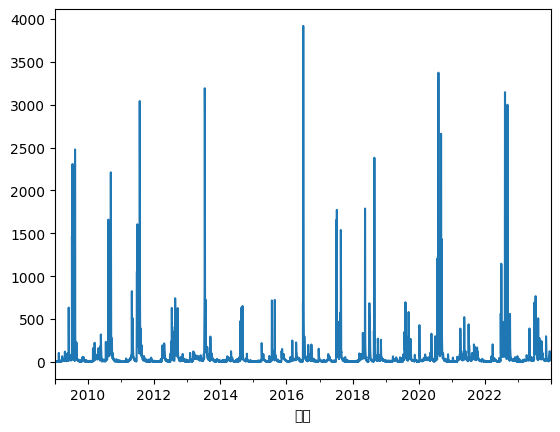

In [38]:
temp = data['유입량(㎥/s)']
temp.plot()

In [86]:

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [87]:
WINDOW_SIZE = 10
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((5466, 10, 1), (5466,))

In [88]:
X_train1, y_train1 = X1[:3650], y1[:3650]
X_val1, y_val1 = X1[3650:4745], y1[3650:4745]
X_test1, y_test1 = X1[4745:], y1[4745:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((3650, 10, 1), (3650,), (1095, 10, 1), (1095,), (721, 10, 1), (721,))

In [94]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import *
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((10, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1))

model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 64)                16896     
                                                                 
 dense_27 (Dense)            (None, 8)                 520       
                                                                 
 dense_28 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, callbacks=[cp1])

Epoch 1/50
115/115 [==============================] - 9s 62ms/step - loss: 44279.8984 - root_mean_squared_error: 210.4279 - val_loss: 40947.8086 - val_root_mean_squared_error: 202.3557
Epoch 2/50
115/115 [==============================] - 4s 39ms/step - loss: 44166.3398 - root_mean_squared_error: 210.1579 - val_loss: 40813.7188 - val_root_mean_squared_error: 202.0240
Epoch 3/50
115/115 [==============================] - 5s 43ms/step - loss: 43973.8945 - root_mean_squared_error: 209.6995 - val_loss: 40534.0430 - val_root_mean_squared_error: 201.3307
Epoch 4/50
115/115 [==============================] - 5s 44ms/step - loss: 43613.8320 - root_mean_squared_error: 208.8392 - val_loss: 40137.2891 - val_root_mean_squared_error: 200.3429
Epoch 5/50
115/115 [==============================] - 4s 39ms/step - loss: 43256.6172 - root_mean_squared_error: 207.9823 - val_loss: 39797.4375 - val_root_mean_squared_error: 199.4930
Epoch 6/50
115/115 [==============================] - 7s 58ms/step - loss: 

In [81]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

115/115 [==============================] - 1s 3ms/step


,Train Predictions,Actuals
0,0.498279,2.222
1,0.498279,0.000
2,0.498279,0.000
3,0.498279,1.507
4,0.498279,0.000
...,...,...
3645,0.498279,3.493
3646,0.498279,17.782
3647,0.498279,3.200
3648,0.498279,9.100


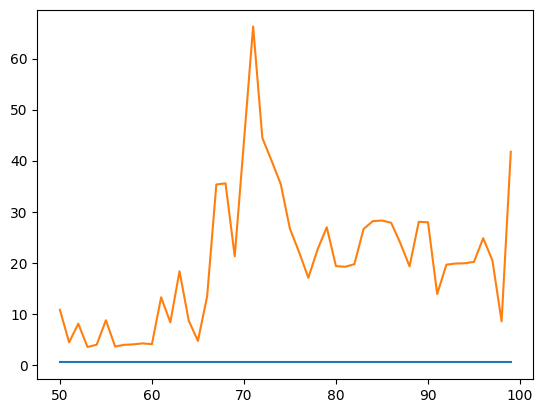

In [82]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [63]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

35/35 [==============================] - 0s 3ms/step


,Val Predictions,Actuals
0,6.628318,3.493
1,9.385347,17.782
2,21.483027,3.200
3,9.356617,9.100
4,13.887388,9.100
...,...,...
1090,9.322886,6.961
1091,7.076203,6.997
1092,10.792131,7.022
1093,8.221666,8.061


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Val Predictions'].plot(kind='hist', bins=20, title='Val Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Actuals'].plot(kind='hist', bins=20, title='Actuals')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Val Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Val Predictions', y='Actuals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Val Predictions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Val Predictions')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Actuals']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Actuals')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Val Predictions'].plot(kind='line', figsize=(8, 4), title='Val Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Actuals'].plot(kind='line', figsize=(8, 4), title='Actuals')
plt.gca().spines[['top', 'right']].set_visible(False)

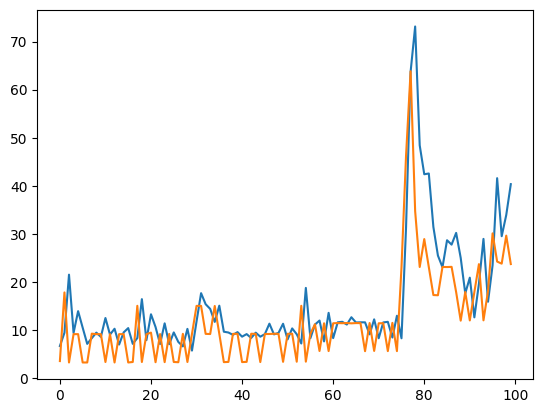

In [64]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])


In [72]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

23/23 [==============================] - 0s 4ms/step


,Test Predictions,Actuals
0,7.006817,2.367
1,6.846254,14.116
2,15.757828,2.508
3,7.491160,8.419
4,13.399903,1.632
...,...,...
721,34.096527,25.785
722,34.612564,30.518
723,40.363400,25.873
724,35.211197,21.186


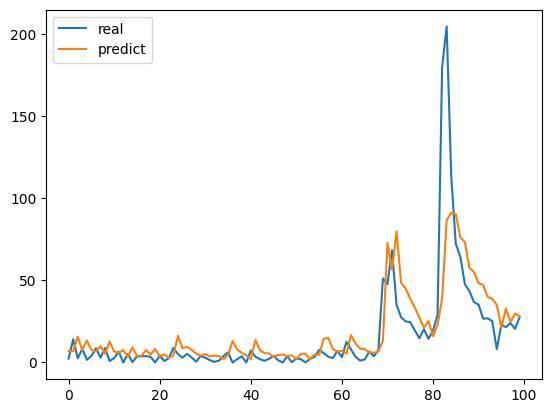

In [74]:
plt.plot(test_results['Actuals'][:100])
plt.plot(test_results['Test Predictions'][:100])
plt.legend(['real', 'predict'])

In [22]:
inputs_1 = tf.keras.Input(shape=6)
dense = tf.keras.layers.Dense(50)(inputs_1)
dense = tf.keras.layers.Dense(50)(dense)
dense = tf.keras.layers.Dense(50)(dense)
dense = tf.keras.layers.Dense(50)(dense)
output = tf.keras.layers.Dense(1)(dense)

model = tf.keras.Model(inputs = [inputs_1], outputs = output)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss='mse', optimizer=optimizer)
model.summary()

ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 6)

Epoch 1/200
3261/3287 [============================>.] - ETA: 0s - loss: 42944.9258
Epoch 1: val_loss improved from inf to 37459.14062, saving model to checkpoint.keras
3287/3287 [==============================] - 22s 6ms/step - loss: 42608.0469 - val_loss: 37459.1406 - lr: 0.0010
Epoch 2/200
3260/3287 [============================>.] - ETA: 0s - loss: 39615.2031
Epoch 2: val_loss did not improve from 37459.14062
3287/3287 [==============================] - 9s 3ms/step - loss: 39295.9609 - val_loss: 43147.9180 - lr: 0.0010
Epoch 3/200
3272/3287 [============================>.] - ETA: 0s - loss: 39720.0938
Epoch 3: val_loss did not improve from 37459.14062

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
3287/3287 [==============================] - 9s 3ms/step - loss: 39542.5625 - val_loss: 42119.5547 - lr: 0.0010
Epoch 4/200
3281/3287 [============================>.] - ETA: 0s - loss: 33294.2812
Epoch 4: val_loss did not improve from 37459.14062
3287/3287 [

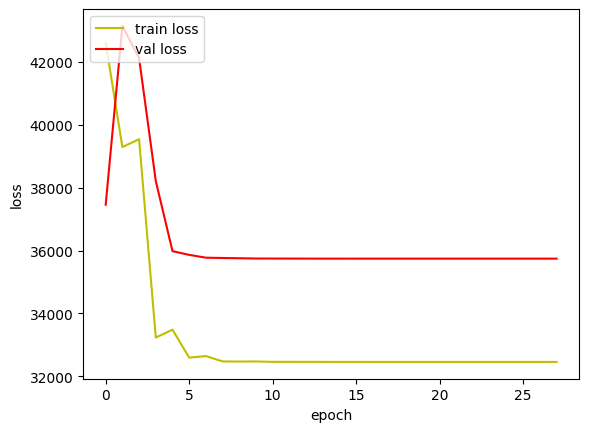

In [17]:
path_checkpoint = 'checkpoint.keras'

callback_checkpoint = ModelCheckpoint (filepath = path_checkpoint, monitor = 'val_loss',verbose = 1,save_weights_only = True, save_best_only = True)
callback_early_stopping = EarlyStopping(monitor='val_loss', patience = 10, verbose = 0)
callback_reduce_lr = ReduceLROnPlateau(monitor='loss', factor = 0.1, patience = 1, verbose = 1)

callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_reduce_lr]

hist = model.fit(trainX, trainY, validation_data=(validX, validY), epochs = 200, batch_size=1, callbacks=callbacks, verbose=1)

fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()

In [18]:
test['날짜'].iloc[0]

'2023-01-01'

In [19]:
time = pd.to_datetime(test['날짜'])

12/12 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYL

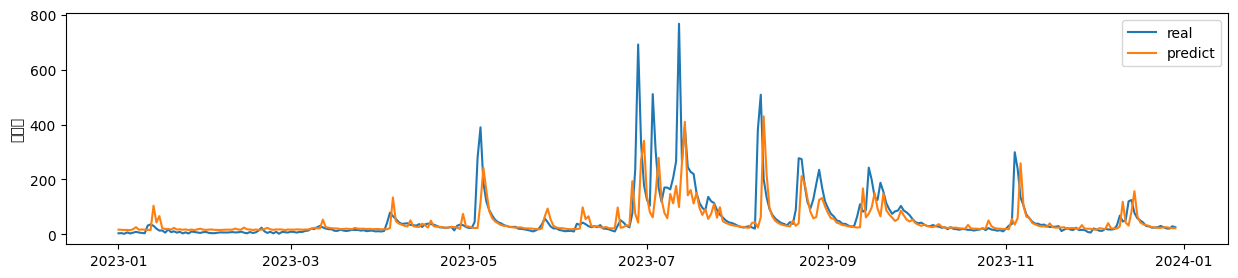

In [20]:
pred = model.predict(testX)
plt.figure(figsize = (15,3))
plt.plot(time, testY.reset_index()['Y'])
plt.plot(time, pred)
plt.ylabel('유입량')
plt.legend(['real', 'predict'])

In [21]:
print('RMSE = ',round((((testY.values-[i[0] for i in pred])**2).sum()/len(pred))**0.5,4))

RMSE =  76.9376
